# penalized logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#load data
data = '../Data/train_set.csv'
df = pd.read_csv(data)
X = df.drop(columns=['fetal_health'])
y = df['fetal_health']

In [2]:
#train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#create pipeline and define hyperparameter grid
pipeline = make_pipeline(
    StandardScaler(), 
    LogisticRegression(solver='liblinear', random_state=42) 
)

param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100, 1000],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [250, 500, 1000, 1500] 
}

#perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy:", best_model.score(X_val, y_val))


Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 250, 'logisticregression__penalty': 'l1'}
Validation Accuracy: 0.888235294117647


In [4]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

         1.0       0.92      0.94      0.93       271
         2.0       0.74      0.70      0.72        69

    accuracy                           0.89       340
   macro avg       0.83      0.82      0.82       340
weighted avg       0.89      0.89      0.89       340



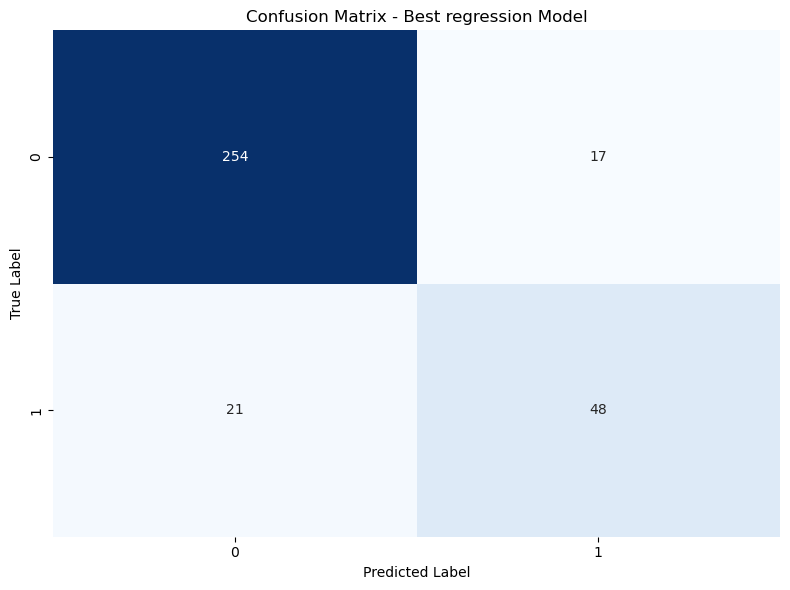

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#visualize confusion matrix
conf_mat = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Best regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()